### Part A

In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df_main = pd.read_csv('P1_Data.csv')

In [3]:
df = df_main.copy()

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [6]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,1.067873,0.507000,-5361.832102,-13.230040,-6.313792,0.481000,5.890532,-14.141708,-20.424599,3.938608,...,-3.621917,6.244264,-11630.293754,24105.732399,-0.929000,103949.541430,3.988717,1451.053607,-3933.396979,-44.650560
std,0.902763,0.500201,1494.941683,2.560369,1.842535,0.499889,1.799838,4.861641,20.571395,0.901204,...,1.805553,0.671938,1534.747192,3111.533532,0.499408,3376.459607,1.739357,246.538717,1405.781722,3.188244
min,0.112200,0.000000,-15323.440000,-23.889000,-14.613000,0.000000,3.942760,-29.850000,-163.680000,3.002990,...,-10.616000,5.760001,-23402.760000,10433.640000,-1.400000,96416.660000,2.144440,-139.080000,-11393.480000,-54.960000
25%,0.396475,0.000000,-5523.540000,-14.325000,-7.453500,0.000000,4.487150,-17.209750,-26.025000,3.261825,...,-4.447000,5.803685,-12032.460000,22905.300000,-1.400000,103814.590000,2.686650,1437.582500,-4495.635000,-46.875000
50%,0.783700,1.000000,-4984.540000,-12.416250,-5.912250,0.000000,5.309600,-14.180050,-14.284000,3.657250,...,-3.064500,5.993600,-11597.425500,23486.040000,-1.400000,103852.225000,3.478100,1504.890000,-4210.100000,-44.505000
75%,1.464250,1.000000,-4731.133500,-11.337000,-4.853100,1.000000,6.856500,-11.066750,-6.504000,4.307000,...,-2.234900,6.399525,-11223.660000,24446.265000,-0.400000,103890.880000,4.759000,1537.961250,-3746.730000,-42.450000
max,4.602000,1.000000,2722.560000,-10.533870,-3.991776,1.000000,12.744000,5.030000,-0.124656,7.555000,...,-1.644240,11.578000,-1190.760000,47423.640000,-0.400000,209390.660000,11.170000,3091.920000,5696.520000,-34.530000


In [7]:
df["Class"].value_counts()

True     506
False    494
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

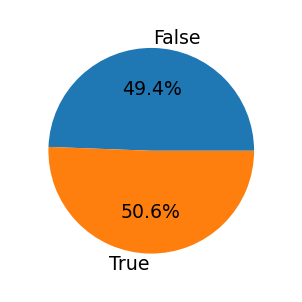

In [8]:
labels = ["False", "True"]
Val=df["Class"].value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(Val, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

Visualisation to check whether the data is balanced or not.

Here, True data is 506 and False data is 494. Its not quite bad, so we can proceed with the data without adding or removing any data's.

### Missing Values

In [9]:
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

Graphical representation to find the missing values in the dataset.

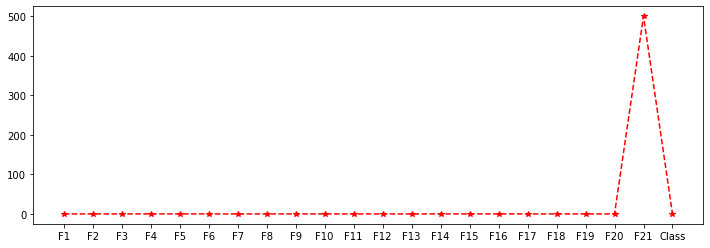

In [10]:
plt.figure(figsize=(12,4))
plt.plot(df.isnull().sum(), 'r*--')

# Removing the missing feature "F21" from the dataset

In [11]:
df=df.drop("F21", axis=1)

In [12]:
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
F1,1.000000,-0.006990,-0.049583,0.002111,0.006976,0.005681,0.039438,0.005632,-0.049179,-0.045470,...,0.036955,-0.025375,-0.002052,0.033486,0.014877,-0.019288,0.029807,-0.020761,-0.037730,0.048997
F2,-0.006990,1.000000,-0.009826,-0.050007,-0.007055,0.032559,0.012570,-0.042880,-0.011814,-0.016538,...,-0.049717,0.049109,-0.020466,-0.022925,-0.019222,-0.037403,-0.019879,0.070705,-0.019158,0.029837
F3,-0.049583,-0.009826,1.000000,0.006406,-0.004322,0.009380,0.003282,0.044698,0.001953,0.042462,...,0.004553,-0.062524,0.296979,0.042754,-0.000864,0.016463,0.287894,0.029493,0.123040,0.018274
F4,0.002111,-0.050007,0.006406,1.000000,-0.068408,-0.016058,-0.000217,-0.006108,-0.020217,0.027008,...,0.041286,-0.057872,0.063753,0.053769,0.012559,-0.045806,0.001481,0.037088,-0.033943,0.007510
F5,0.006976,-0.007055,-0.004322,-0.068408,1.000000,0.004205,-0.025508,-0.037295,-0.000686,-0.006901,...,0.005760,0.014207,0.008733,0.003705,0.031534,0.042314,0.064432,0.053084,0.044764,0.026389
F6,0.005681,0.032559,0.009380,-0.016058,0.004205,1.000000,0.025433,-0.067913,0.010262,0.022900,...,-0.000958,-0.030887,0.016723,-0.025854,0.025858,0.025180,0.024911,-0.024538,0.026289,0.010464
F7,0.039438,0.012570,0.003282,-0.000217,-0.025508,0.025433,1.000000,-0.019820,0.014276,-0.042789,...,-0.005135,-0.027272,0.037528,-0.228368,-0.002169,-0.014168,-0.003312,0.004320,0.004537,-0.022172
F8,0.005632,-0.042880,0.044698,-0.006108,-0.037295,-0.067913,-0.019820,1.000000,0.023469,-0.023646,...,0.020446,0.012373,-0.021339,-0.000878,-0.026336,0.003288,-0.001644,-0.047412,0.019980,0.027641
F9,-0.049179,-0.011814,0.001953,-0.020217,-0.000686,0.010262,0.014276,0.023469,1.000000,0.042713,...,-0.074935,0.005803,0.020361,-0.005679,0.014585,0.018965,-0.018222,-0.024747,0.012361,-0.045664
F10,-0.045470,-0.016538,0.042462,0.027008,-0.006901,0.022900,-0.042789,-0.023646,0.042713,1.000000,...,0.048212,-0.012591,0.041041,-0.055473,0.069944,0.037891,0.011183,-0.000167,-0.213338,-0.039024


<AxesSubplot:>

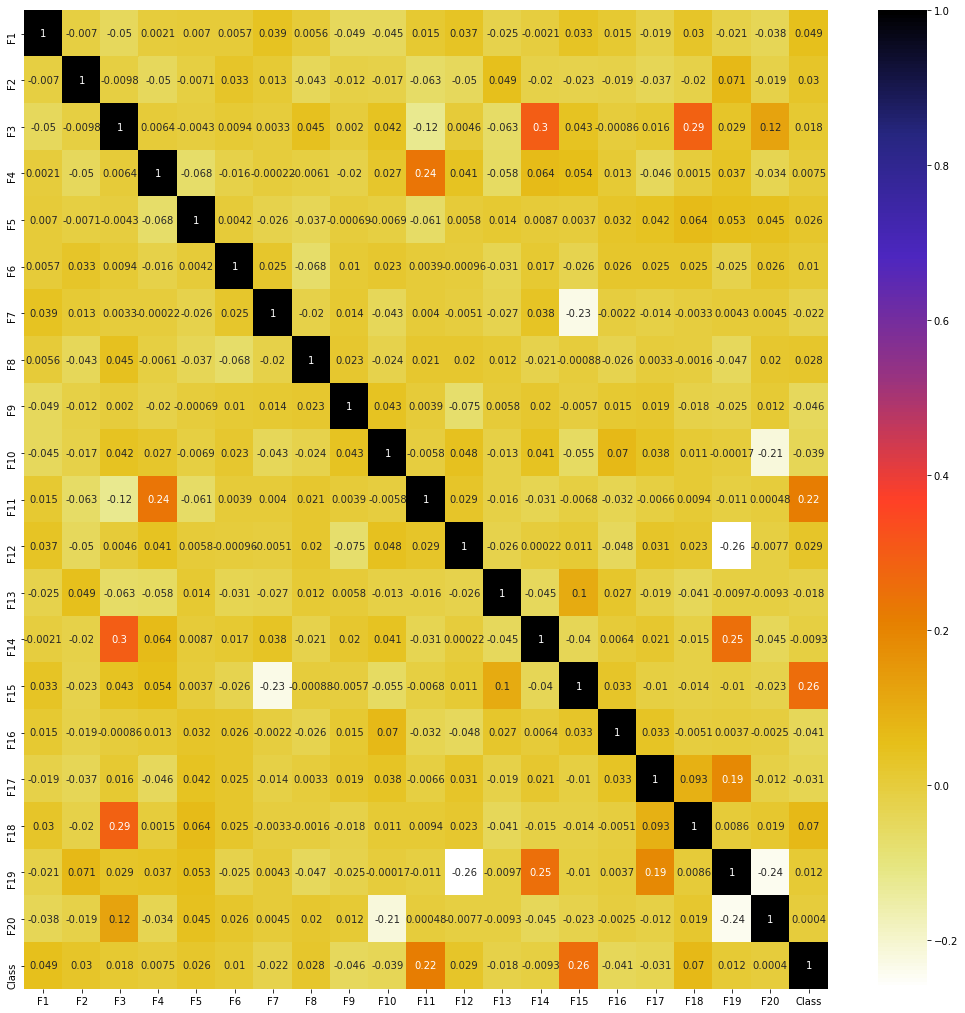

In [13]:
#Using Pearson Correlation

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, cmap=plt.cm.CMRmap_r)

In [14]:
def correlation(data, threshold):
    col_corr=set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
X = df.drop('Class', axis=1)
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=11, shuffle=True)

In [16]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

0

### Decision Tree Algorithm

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
p1 = dtree.predict(X_test)

In [18]:
confusion_matrix(y_test,p1)

array([[129,  23],
       [ 25, 123]], dtype=int64)

In [19]:
classification_report(y_test,p1)

'              precision    recall  f1-score   support\n\n       False       0.84      0.85      0.84       152\n        True       0.84      0.83      0.84       148\n\n    accuracy                           0.84       300\n   macro avg       0.84      0.84      0.84       300\nweighted avg       0.84      0.84      0.84       300\n'

In [20]:
accuracy_score(y_test,p1)*100

84.0

The Test accuracy for the Decision Tree model without a feature "F21" is 83%

# Predicting the Missing Values in "F21"

The column "F21" contains 50% of missing continuous values.
Predicting the missing continuous values using a regression algorithm - LinearRegressor

In [21]:
def Predict_F21(df_main):
    from sklearn.linear_model import LinearRegression

    data = df_main.drop("Class",axis=1).copy()
    data_y = df_main["Class"]

    test_data = data[data["F21"].isnull()]
    data.dropna(inplace=True)

    f21_y_train = data["F21"]
    f21_X_train = data.drop("F21", axis=1)
    f21_X_test = test_data.drop("F21", axis=1)

    model = LinearRegression()
    model.fit(f21_X_train, f21_y_train)

    f21_y_pred = model.predict(f21_X_test)
    f21_test=f21_X_test.assign(F21=f21_y_pred)
    full_data = pd.concat([data,f21_test])
    return full_data

In [22]:
data = df_main.drop("Class",axis=1).copy()
data_y = df_main["Class"]
full_data = Predict_F21(df_main)

In [23]:
full_data.sort_index(axis = 0)
full_data = full_data.assign(Class=data_y)

In [24]:
X_fulldata = full_data.drop("Class", axis=1)
y_fulldata = full_data["Class"]

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_fulldata,y_fulldata, train_size=0.7, random_state=9, shuffle=True)

In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train1, y_train1)
p2 = dtree.predict(X_test1)

In [27]:
confusion_matrix(y_test1,p2)

array([[122,  19],
       [ 37, 122]], dtype=int64)

In [28]:
accuracy_score(y_test1,p2)*100

81.33333333333333

Using Linear regression algorithm, the feature "F21" Nan values are predicted. By using this complete dataset (without missing values), the accuracy of the decision tree is 81%.

It's quite good score compared to the score of dataset with feature removed.

# Replacing the Nan values with mean values 

In [29]:
d = df_main.copy()
d.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


In [30]:
d['F21']=d['F21'].replace(np.NaN,d['F21'].mean())

In [31]:
X_d = d.drop("Class", axis=1)
y_d = d["Class"]

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_d,y_d, train_size=0.7, random_state=9, shuffle=True)

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train2, y_train2)
p3 = dtree.predict(X_test2)
DT_acc=accuracy_score(y_test2,p3)*100

In [34]:
accuracy_score(y_test2,p3)*100

83.66666666666667

By replacing the Nan values with mean values of that feature. The score obtained is 83%. 

By comparing the three methods for missing feature,
We could find that predicting the missing values methodology gives better score than other two methods(removing feature and replace with mean values)

Lets try with different algorithms


# Different Algorithms:

Let us use the complete dataset(predicted the missing values) with different algorithms to compare the accuracy score

Train data - X_train1, y_train1

Test Data - X_test1, y_test1

Algorithms :

        Logistic Regression
        Random Forest
        Support Vector Machine
        Naive Bayes
        K-Nearest Neighbour
        

In [35]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train1, y_train1)
pred1 = logreg.predict(X_test1)
classification_report(y_test1,pred1)
LR_acc=accuracy_score(y_test1,pred1)*100
accuracy_score(y_test1,pred1)*100

69.33333333333334

In [36]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=500)
RF.fit(X_train1, y_train1)
pred2=RF.predict(X_test1)
RF_acc = accuracy_score(y_test1,pred2)*100
accuracy_score(y_test1,pred2)*100

84.33333333333334

In [37]:
# Standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [38]:
#Choosing best Parm for SVM using GridSearchCV

from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc = svm.SVC(kernel='rbf', C =5)
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1,3,5,10,15]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train1, y_train1)

GridSearchCV(estimator=SVC(C=5),
             param_grid={'C': [1, 3, 5, 10, 15],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [39]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [40]:
#SVM with best param

svc = svm.SVC(kernel='rbf', C =10)
svc.fit(X_train1,y_train1)
pred3 = svc.predict(X_test1)
svm_acc = accuracy_score(y_test1,pred3)*100
accuracy_score(y_test1,pred3)*100

73.0

In [41]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train1, y_train1)
pred4 = GNB.predict(X_test1)
NB_acc = accuracy_score(y_test1,pred4)*100
accuracy_score(y_test1,pred4)*100

57.666666666666664

In [42]:
#KNN

from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train1, y_train1)
nca_acc = nca_pipe.score(X_test1, y_test1)*100
nca_pipe.score(X_test1, y_test1)*100

71.33333333333334

# Choosing the best model 

Based on the accuracy from different model. Let us plot, compare and choose the best model.

Text(0, 0.5, 'Accuracy in %')

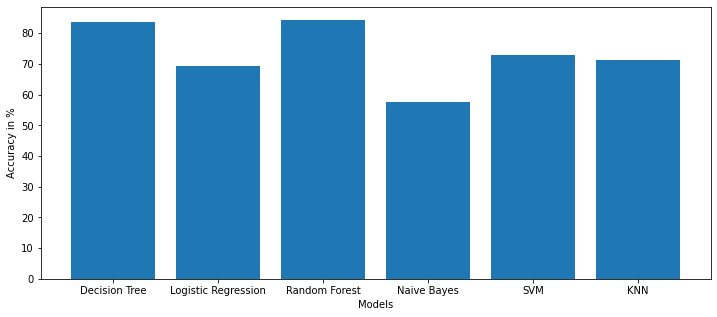

In [43]:
models = ["Decision Tree","Logistic Regression", "Random Forest", "Naive Bayes", "SVM", "KNN"]
accuracies = [DT_acc, LR_acc, RF_acc, NB_acc, svm_acc, nca_acc]
plt.figure(figsize=(12,5))
plt.bar(models,accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy in %")

On Comparison, we could find that Random forest is having a highest accuracy of all. 

So for the next part, we are going to use Random Forest to predict the values.

### Part B

In [44]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('P1_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

#Predicting the missing values in F21
final_data = Predict_F21(test_df)

#Predicting the Class
predicted = RF.predict(final_data)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('P1_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P1_Test.csv').iloc[:,:-1].equals(pd.read_csv('P1_Test_Predictions.csv').iloc[:,:-1])